In [4]:
library(Seurat)
library(tidyverse)
library(patchwork)
options(tibble.print_max = Inf, width=200)

In [2]:
xenium.obj = qs::qread('_targets/objects/obj_merged')
xenium.obj

An object of class Seurat 
400 features across 119775 samples within 4 assays 
Active assay: Xenium (100 features, 0 variable features)
 3 other assays present: BlankCodeword, ControlCodeword, ControlProbe
 8 spatial fields of view present: fov fov.1 fov.2 fov.3 fov.4 fov.5 fov.6 fov.7

In [5]:
# remove cells with 0 counts
xenium.obj <- subset(xenium.obj, subset = nCount_Xenium > 0)
# Create a vector of cells to keep
keep_cells = xenium.obj %>%
`[[` %>%
rownames_to_column %>%
filter(rowname != "0") %>%
pull(rowname)
# Subset the Seurat object to drop the cells
xenium.obj <- subset(xenium.obj, cells=keep_cells)
xenium.obj

An object of class Seurat 
400 features across 119775 samples within 4 assays 
Active assay: Xenium (100 features, 0 variable features)
 3 other assays present: BlankCodeword, ControlCodeword, ControlProbe
 8 spatial fields of view present: fov fov.1 fov.2 fov.3 fov.4 fov.5 fov.6 fov.7

In [6]:
summary_tibble <- xenium.obj %>% 
`[[` %>%
#   group_by(seurat_clusters) %>%
  summarise(
    n = n(),
    min = min(nCount_Xenium),
    max = max(nCount_Xenium),
    mean = mean(nCount_Xenium),
    stdev = sd(nCount_Xenium),
    quantiles = list(quantile(nCount_Xenium, probs = c(seq(0, 0.9, by=0.1), seq(0.91, 1, by= 0.01)), names = FALSE))
  ) %>%
  unnest_wider(quantiles, names_sep = "") %>%
  rename_with(~paste0("Q", c(seq(0, 0.9, by=0.1), seq(0.91, 1, by= 0.01))), starts_with("quantiles"))

summary_tibble %>% print


# A tibble: 1 × 25
       n   min     max  mean stdev    Q0  Q0.1  Q0.2  Q0.3  Q0.4  Q0.5  Q0.6  Q0.7  Q0.8  Q0.9 Q0.91 Q0.92 Q0.93 Q0.94 Q0.95 Q0.96 Q0.97 Q0.98 Q0.99      Q1
   <int> <dbl>   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>
1 119775     3 1073434  174. 6585.     3     8    14    23    38    63   101   153   223   328   342   357   373   391   411   435   462   500   557 1073434


In [18]:
summary_tibble <- xenium.obj %>% 
`[[` %>%
#   group_by(seurat_clusters) %>%
 filter(!is.na(nucleus_area)) %>%
  summarise(
    n = n(),
    min = min(nucleus_area),
    max = max(nucleus_area),
    mean = mean(nucleus_area),
    stdev = sd(nucleus_area),
    quantiles = list(quantile(nucleus_area, probs = c(seq(0, 0.10, by=0.01), seq(0.2, 0.9, by=0.1), seq(0.91, 1, by= 0.01)), names = FALSE))
  ) %>%
  unnest_wider(quantiles, names_sep = "") %>%
  rename_with(~paste0("Q", c(seq(0, 0.10, by=0.01), seq(0.2, 0.9, by=0.1), seq(0.91, 1, by= 0.01))), starts_with("quantiles")) %>%
t

summary_tibble 


n,30912.000
min,1.500
max,19304.500
mean,2330.822
stdev,1251.718
Q0,1.500
Q0.01,372.500
Q0.02,494.110
Q0.03,581.000
Q0.04,658.500
Q0.05,718.825


In [28]:
summary_tibble <- xenium.obj %>% 
`[[` %>%
#   group_by(seurat_clusters) %>%
 filter(!is.na(nFeature_Xenium)) %>%
  summarise(
    n = n(),
    min = min(nFeature_Xenium),
    max = max(nFeature_Xenium),
    mean = mean(nFeature_Xenium),
    stdev = sd(nFeature_Xenium),
    quantiles = list(quantile(nFeature_Xenium, probs = c(seq(0, 0.10, by=0.01), seq(0.2, 0.9, by=0.1), seq(0.91, 1, by= 0.01)), names = FALSE))
  ) %>%
  unnest_wider(quantiles, names_sep = "") %>%
  rename_with(~paste0("Q", c(seq(0, 0.10, by=0.01), seq(0.2, 0.9, by=0.1), seq(0.91, 1, by= 0.01))), starts_with("quantiles")) %>%
t

summary_tibble 


n,119775.00000
min,1.00000
max,100.00000
mean,28.73277
stdev,19.26294
Q0,1.00000
Q0.01,3.00000
Q0.02,3.00000
Q0.03,3.00000
Q0.04,4.00000
Q0.05,4.00000


In [19]:
summary_tibble <- xenium.obj %>% 
`[[` %>%
#   group_by(seurat_clusters) %>%
  summarise(
    n = n(),
    min = min(cell_area, na.rm = TRUE),
    max = max(cell_area, na.rm = TRUE),
    mean = mean(cell_area, na.rm = TRUE),
    stdev = sd(cell_area, na.rm = TRUE),
    quantiles = list(quantile(cell_area, probs = c(seq(0, 0.9, by=0.1), seq(0.91, 1, by= 0.01)), names = FALSE, na.rm = TRUE))
  ) %>%
  unnest_wider(quantiles, names_sep = "") %>%
  rename_with(~paste0("Q", c(seq(0, 0.9, by=0.1), seq(0.91, 1, by= 0.01))), starts_with("quantiles"))


summary_tibble %>% print


# A tibble: 1 × 25
       n   min   max  mean stdev    Q0  Q0.1  Q0.2  Q0.3  Q0.4  Q0.5  Q0.6  Q0.7  Q0.8  Q0.9 Q0.91 Q0.92 Q0.93 Q0.94 Q0.95 Q0.96 Q0.97 Q0.98 Q0.99    Q1
   <int> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 119775   0.5 18470 2087. 2158.   0.5  65.5  178.   376   727  1298  2061  2958  3992  5330  5502  5698  5898  6112 6371.  6664  7017 7475. 8232. 18470


In [27]:
xenium.obj %>% `[[` %>% colnames

[1] "orig.ident"               "nCount_Xenium"            "nFeature_Xenium"          "nCount_BlankCodeword"     "nFeature_BlankCodeword"   "nCount_ControlCodeword"   "nFeature_ControlCodeword"
 [8] "nCount_ControlProbe"      "nFeature_ControlProbe"    "cell_area"                "density"                  "elongation"               "avg_confidence"           "nucleus_area"            
[15] "sample_name"              "treatment"                "strain"                   "time"

In [31]:
keep_cells = xenium.obj %>% `[[` %>%
filter(cell_area < 7000) %>%
filter(cell_area > 360) %>%
filter(avg_confidence >= 0.97) %>%
filter(nCount_Xenium >= 10) %>%
filter(nCount_Xenium <= 600) %>%
filter(nFeature_Xenium >= 6) %>%
filter(nFeature_Xenium <= 70) %>%
rownames

length(keep_cells)

[1] 78959

In [9]:
xenium.obj = subset(xenium.obj, cells = keep_cells) %>% 
    Seurat::SCTransform(assay='Xenium',
                        method="glmGamPoi",
                        verbose=TRUE)
xenium.obj

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 100 by 63884

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 99 genes, 5000 cells



  |==============================================================================================================================================================================================| 100%


Second step: Get residuals using fitted parameters for 100 genes



  |==============================================================================================================================================================================================| 100%


Computing corrected count matrix for 100 genes



  |==============================================================================================================================================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 10.32917 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..SCTransform.Xenium; see ?make.names for more details on syntax validity”


An object of class Seurat 
500 features across 63884 samples within 5 assays 
Active assay: SCT (100 features, 100 variable features)
 4 other assays present: Xenium, BlankCodeword, ControlCodeword, ControlProbe
 8 spatial fields of view present: fov fov.1 fov.2 fov.3 fov.4 fov.5 fov.6 fov.7

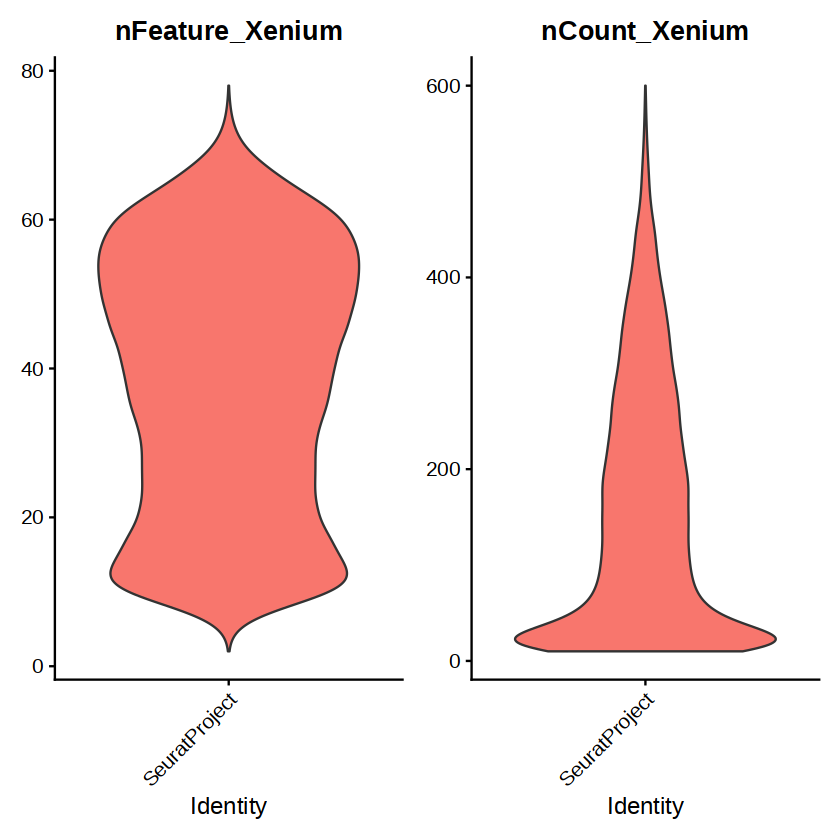

In [10]:
VlnPlot(xenium.obj, features = c("nFeature_Xenium", "nCount_Xenium"), ncol = 2, pt.size = 0)

In [11]:
summary_tibble <- xenium.obj %>% 
`[[` %>%
#   group_by(seurat_clusters) %>%
  summarise(
    n = n(),
    min = min(nCount_Xenium),
    max = max(nCount_Xenium),
    mean = mean(nCount_Xenium),
    stdev = sd(nCount_Xenium),
    quantiles = list(quantile(nCount_Xenium, probs = c(seq(0, 0.9, by=0.1), seq(0.91, 1, by= 0.01)), names = FALSE))
  ) %>%
  unnest_wider(quantiles, names_sep = "") %>%
  rename_with(~paste0("Q", c(seq(0, 0.9, by=0.1), seq(0.91, 1, by= 0.01))), starts_with("quantiles"))

summary_tibble %>% print


# A tibble: 1 × 25
      n   min   max  mean stdev    Q0  Q0.1  Q0.2  Q0.3  Q0.4  Q0.5  Q0.6  Q0.7  Q0.8  Q0.9 Q0.91 Q0.92 Q0.93 Q0.94 Q0.95 Q0.96 Q0.97 Q0.98 Q0.99    Q1
  <int> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 63884    10   600  160.  130.    10    18    30    53    90   134   178   225   281   353   362   372   382   393   406   421   439   459   494   600


In [12]:
summary_tibble <- xenium.obj %>% 
`[[` %>%
#   group_by(seurat_clusters) %>%
  summarise(
    n = n(),
    min = min(cell_area, na.rm = TRUE),
    max = max(cell_area, na.rm = TRUE),
    mean = mean(cell_area, na.rm = TRUE),
    stdev = sd(cell_area, na.rm = TRUE),
    quantiles = list(quantile(cell_area, probs = c(seq(0, 0.9, by=0.1), seq(0.91, 1, by= 0.01)), names = FALSE, na.rm = TRUE))
  ) %>%
  unnest_wider(quantiles, names_sep = "") %>%
  rename_with(~paste0("Q", c(seq(0, 0.9, by=0.1), seq(0.91, 1, by= 0.01))), starts_with("quantiles"))

options(tibble.print_max = Inf, width=200)
summary_tibble %>% print


# A tibble: 1 × 25
      n   min   max  mean stdev    Q0  Q0.1  Q0.2  Q0.3  Q0.4  Q0.5  Q0.6  Q0.7  Q0.8  Q0.9 Q0.91 Q0.92 Q0.93 Q0.94 Q0.95 Q0.96 Q0.97 Q0.98 Q0.99    Q1
  <int> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 63884  100.  6999 2641. 1996.  100.   249  492.  936.  1648  2424  3176  3898  4658  5553 5665. 5774.  5890  6007  6134  6278  6438 6598.  6784  6999


In [13]:
xenium.obj <- RunPCA(xenium.obj, npcs = 30, features = rownames(xenium.obj))

PC_ 1 
Positive:  Plp1, Bmp4, Ptprd, Plcl1, Pdgfra, Pcdh9, Lmx1a, Nkain2, Plxdc2, Lrmda 
	   Csmd1, Pcdh11x, Naaladl2, Immp2l, Cfap299, Fhit, P3h2, Htr3b, Pdzrn3, Rtl4 
	   Macrod2, Slc7a11, Rgs6, Il1rapl2, Oxr1, Zfp804b, Adarb2, Gpc5, Lef1, Gtdc1 
Negative:  Gria1, Nrxn3, Alcam, Col25a1, Pcdh7, Ncam2, Rbfox1, Tenm2, Fam155a, Ctnna2 
	   Tenm3, Dlg2, Arhgap6, Kcnip4, Rmst, Slc1a2, Slit2, Agrp, Ptprt, Pomc 
	   Fgf13, Cacna2d3, Hs3st4, Brinp3, Prkca, Nrg3, Gabrg3, Trpm3, Grm7, Kcnq3 
PC_ 2 
Positive:  Agrp, Pomc, Arhgap6, Ptprk, Kctd16, Zfhx3, Plp1, Hdac9, Rax, Deptor 
	   Tox, Pde10a, Oxr1, Cntn5, Prkca, Htr3b, Pdzrn3, P3h2, Lmx1a, Kcnip4 
	   Fam155a, Il1rapl2, Car10, Immp2l, Pcdh11x, Csmd1, Cfap299, Fhit, Macrod2, Nrg3 
Negative:  Alcam, Slc1a2, Pdgfra, Tenm2, Aqp4, Brinp3, Rbfox1, Gria1, Hs3st4, Kcnq3 
	   Grm7, Tenm3, Nrxn3, Luzp2, Cadm2, Lrp1b, Nxph1, Pde4b, Ptprt, Col25a1 
	   Trpm3, Plxdc2, Plcb1, Ptprd, Slit2, Cacna2d3, Robo1, Lingo2, Dcc, Kirrel3 
PC_ 3 
Positive:  Agrp, Aqp4,

xenium.obj <- RunUMAP(xenium.obj, dims = 1:30)

In [14]:
xenium.obj <- FindNeighbors(xenium.obj, reduction = "pca", dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [15]:
xenium.obj <- FindClusters(xenium.obj, resolution = 0.8)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 63884
Number of edges: 1920966

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8891
Number of communities: 34
Elapsed time: 20 seconds


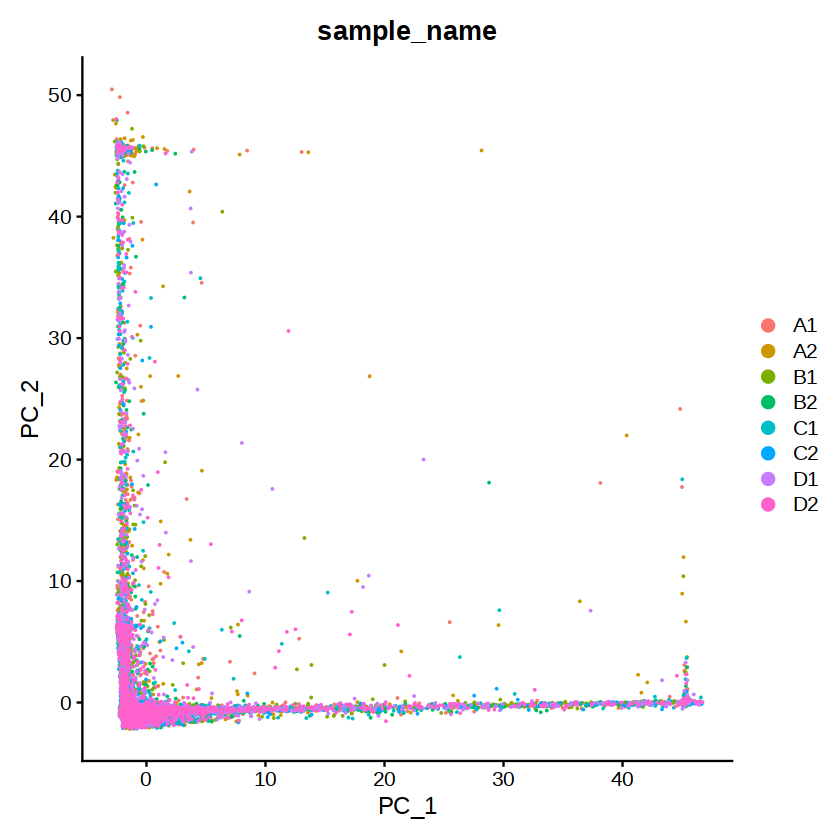

In [16]:
DimPlot(xenium.obj, group.by = 'sample_name')

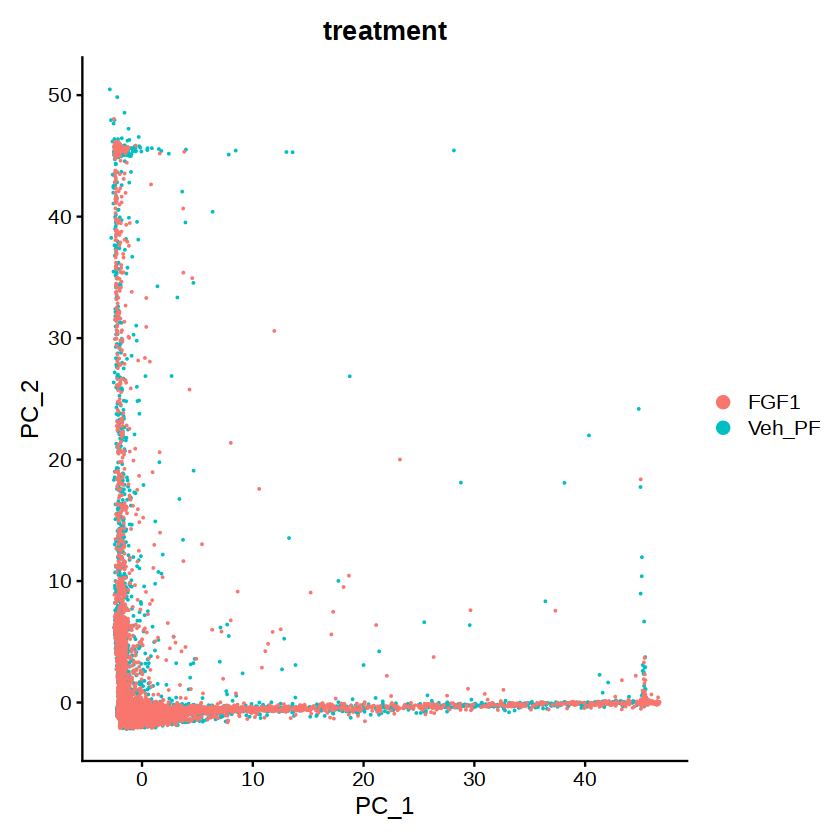

In [17]:
DimPlot(xenium.obj, group.by = 'treatment')

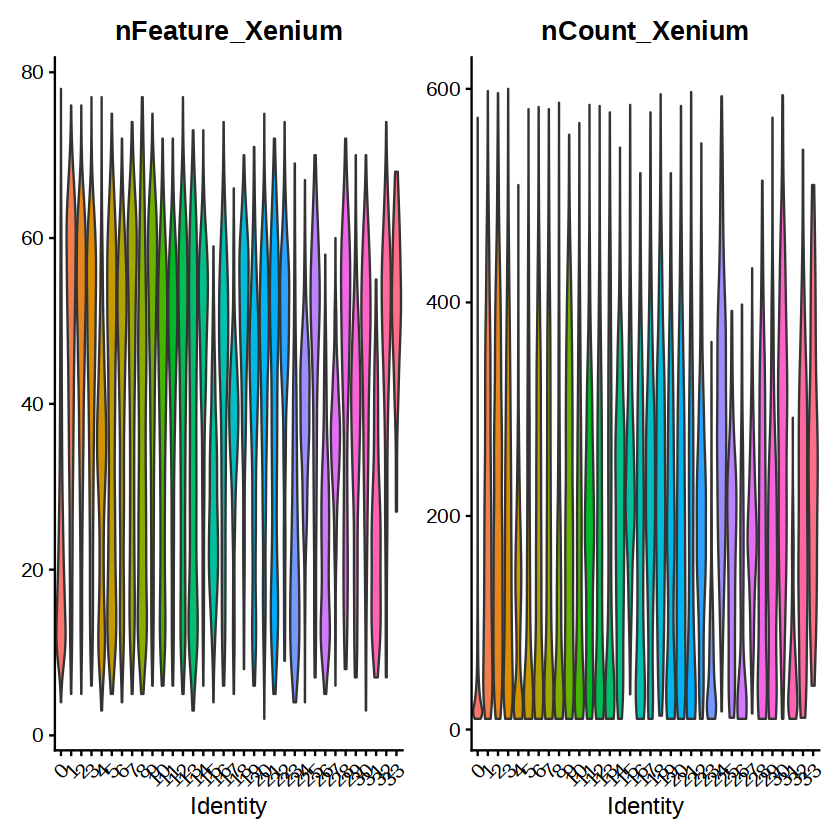

In [18]:
VlnPlot(xenium.obj, features = c("nFeature_Xenium", "nCount_Xenium"), ncol = 2, pt.size = 0, group.by='seurat_clusters')

In [21]:
obj_fgf1 = qs::qread('/projects/petar/fgf1/full_obj_sct.qs')
obj_fgf1

An object of class Seurat 
59498 features across 144643 samples within 3 assays 
Active assay: SCT (27177 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [22]:
source('../00_preprocessing/preprocessing.R')

In [23]:
obob5_cells = obj_fgf1 %>%
`[[` %>%
filter(strain == 'obob') %>%
filter(time == 'Day5') %>%
rownames

In [24]:
obj_fgf1 = subset(obj_fgf1, cells=obob5_cells)
obj_fgf1

An object of class Seurat 
59498 features across 58235 samples within 3 assays 
Active assay: SCT (27177 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [25]:
obj_fgf1 = obj_fgf1 %>%
sc_transform_fgf1 
obj_fgf1

vst.flavor='v2' set, setting model to use fixed slope and exclude poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Total Step 1 genes: 22268

Total overdispersed genes: 21778

Excluding 490 genes from Step 1 because they are not overdispersed.

Variance stabilizing transformation of count matrix of size 26292 by 58235

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |==============================================================================================================================================================================================| 100%


Setting estimate of  249 genes to inf as theta_mm/theta_mle < 1e-3

# of step1 poisson genes (variance < mean): 0

# of low mean genes (mean < 0.001): 4165

Total # of Step1 poisson genes (theta=Inf; variance < mean): 289

Total # of poisson genes (theta=Inf; variance < mean): 4535

Calling offset model for all 4535 poisson genes

Found 316 outliers - those will be ignored in fitting/regularization step


Ignoring theta inf genes

Replacing fit params for 4535 poisson genes by theta=Inf

Setting min_variance based on median UMI:  0.16

Second step: Get residuals using fitted parameters for 26292 genes



  |==============================================================================================================================================================================================| 100%


Computing corrected count matrix for 26292 genes



  |==============================================================================================================================================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 22.1032 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out batch

Centering data matrix

Set default assay to SCT

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..SCTransform.RNA; see ?make.names for more details on syntax validity”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:46:07 UMAP embedding parameters a = 0.9922 b = 1.112

09:46:07 Read 58235 rows and found 30 numeric columns

09:46:07 Using Annoy for neighbor search, n_neighbors = 30

09:46:07 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|

An object of class Seurat 
58613 features across 58235 samples within 3 assays 
Active assay: SCT (26292 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [26]:
obj_fgf1 = obj_fgf1 %>% 
Seurat::RunUMAP(reduction = "pca", dims = 1:30, return.model = TRUE)

UMAP will return its model

09:48:58 UMAP embedding parameters a = 0.9922 b = 1.112

09:48:58 Read 58235 rows and found 30 numeric columns

09:48:58 Using Annoy for neighbor search, n_neighbors = 30

09:48:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:49:07 Writing NN index file to temp file /scratch/nmq407/R_tmp//RtmpYaoX8N/file101c02d1b8da8

09:49:07 Searching Annoy index using 1 thread, search_k = 3000

09:49:28 Annoy recall = 100%

09:49:31 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

09:49:35 Initializing from normalized Laplacian + noise (using irlba)

09:49:50 Commencing optimization for 200 epochs, with 2481198 positive edges

09:51:07 Optimization finished



In [38]:
obj_fgf1 %>% qs::qsave('obj_fgf1_obob5v5.qs')

In [ ]:
# obj_fgf1 %>% qs::qsave('../obob_Day5_obj_sct.qs')
# obj_fgf1 = qs::qread('../obob_Day5_obj_sct.qs')

# All Xe genes integ

In [27]:
xenium.obj

An object of class Seurat 
500 features across 63884 samples within 5 assays 
Active assay: SCT (100 features, 100 variable features)
 4 other assays present: Xenium, BlankCodeword, ControlCodeword, ControlProbe
 1 dimensional reduction calculated: pca
 8 spatial fields of view present: fov fov.1 fov.2 fov.3 fov.4 fov.5 fov.6 fov.7

In [28]:
xenium_genes = xenium.obj@assays$Xenium@meta.features %>% rownames
ref_genes = obj_fgf1@assays$RNA@meta.features %>% rownames
xenium_genes = xenium_genes %>% intersect(ref_genes)
xenium_genes = xenium_genes %>% tibble %>% filter(. != 'Lmx1a') %>% pull

length(xenium_genes)
xenium_genes

[1] 98

[1] "Sorcs1"   "Lingo2"   "Cntn4"    "Tenm2"    "Sox5"     "Ptprd"    "Robo1"    "Plcl1"    "Oxr1"     "Plxdc2"   "Plp1"     "Kirrel3"  "Mgat4c"   "Tenm3"    "Slit2"    "Nrg3"     "Hdac9"   
[18] "Col25a1"  "Ncam2"    "Rbfox1"   "Fgf13"    "Pde10a"   "Deptor"   "Alcam"    "Gria1"    "Grid2"    "Grm7"     "Agrp"     "Naaladl2" "Ntm"      "Gpc5"     "Hs3st4"   "Lef1"     "Erbb4"   
[35] "Kctd16"   "Zfhx3"    "Gtdc1"    "Pdgfra"   "Nrg1"     "Macrod2"  "Gpc6"     "Pcdh11x"  "Kcnip4"   "Brinp3"   "Cadm2"    "Pde4b"    "Fhit"     "Rgs6"     "Prkg1"    "Dlg2"     "Ptprk"   
[52] "Luzp2"    "Ptprt"    "Nxph1"    "Kcnq3"    "Lrmda"    "Dcc"      "Cntn5"    "Adarb2"   "Gabrg3"   "Rmst"     "Lrp1b"    "Trpm3"    "P3h2"     "Prr16"    "Prkca"    "Nrxn3"    "Aqp4"    
[69] "Ctnna2"   "Inpp4b"   "Sgcz"     "Fat3"     "Plcb1"    "Cacna2d3" "Bmp4"     "Tox"      "Car10"    "Nkain2"   "Galntl6"  "Slc7a11"  "Pcdh9"    "Slc1a2"   "Pdzrn3"   "Rax"      "Pomc"    
[86] "Zfp804b"  "Wwox"     "Pcdh7"    "Grm8"     "Rtl4"     "Il1rapl2" "Sgcd"     "Egfem1"   "Arhgap6"  "Immp2l"   "Cfap299"  "Htr3b"    "Csmd1"

In [43]:
cat(xenium_genes)

Sorcs1 Lingo2 Cntn4 Tenm2 Sox5 Ptprd Robo1 Plcl1 Oxr1 Plxdc2 Plp1 Kirrel3 Mgat4c Tenm3 Slit2 Nrg3 Hdac9 Col25a1 Ncam2 Rbfox1 Fgf13 Pde10a Deptor Alcam Gria1 Grid2 Grm7 Agrp Naaladl2 Ntm Gpc5 Hs3st4 Lef1 Erbb4 Kctd16 Zfhx3 Gtdc1 Pdgfra Nrg1 Macrod2 Gpc6 Pcdh11x Kcnip4 Brinp3 Cadm2 Pde4b Fhit Rgs6 Prkg1 Dlg2 Ptprk Luzp2 Ptprt Nxph1 Kcnq3 Lrmda Dcc Cntn5 Adarb2 Gabrg3 Rmst Lrp1b Trpm3 P3h2 Prr16 Prkca Nrxn3 Aqp4 Ctnna2 Inpp4b Sgcz Fat3 Plcb1 Cacna2d3 Bmp4 Tox Car10 Nkain2 Galntl6 Slc7a11 Pcdh9 Slc1a2 Pdzrn3 Rax Pomc Zfp804b Wwox Pcdh7 Grm8 Rtl4 Il1rapl2 Sgcd Egfem1 Arhgap6 Immp2l Cfap299 Htr3b Csmd1

In [29]:
xenium.obj = RunUMAP(xenium.obj, assay='Xenium', slot='counts', features = xenium_genes)

10:04:24 UMAP embedding parameters a = 0.9922 b = 1.112

10:04:24 Read 63884 rows and found 98 numeric columns

10:04:24 Using Annoy for neighbor search, n_neighbors = 30

10:04:24 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:04:43 Writing NN index file to temp file /scratch/nmq407/R_tmp//RtmpYaoX8N/file101c034f9bf64

10:04:43 Searching Annoy index using 1 thread, search_k = 3000

10:05:20 Annoy recall = 99.97%

10:05:22 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:05:28 Initializing from normalized Laplacian + noise (using irlba)

10:05:33 Commencing optimization for 200 epochs, with 3206840 positive edges

10:07:12 Optimization finished



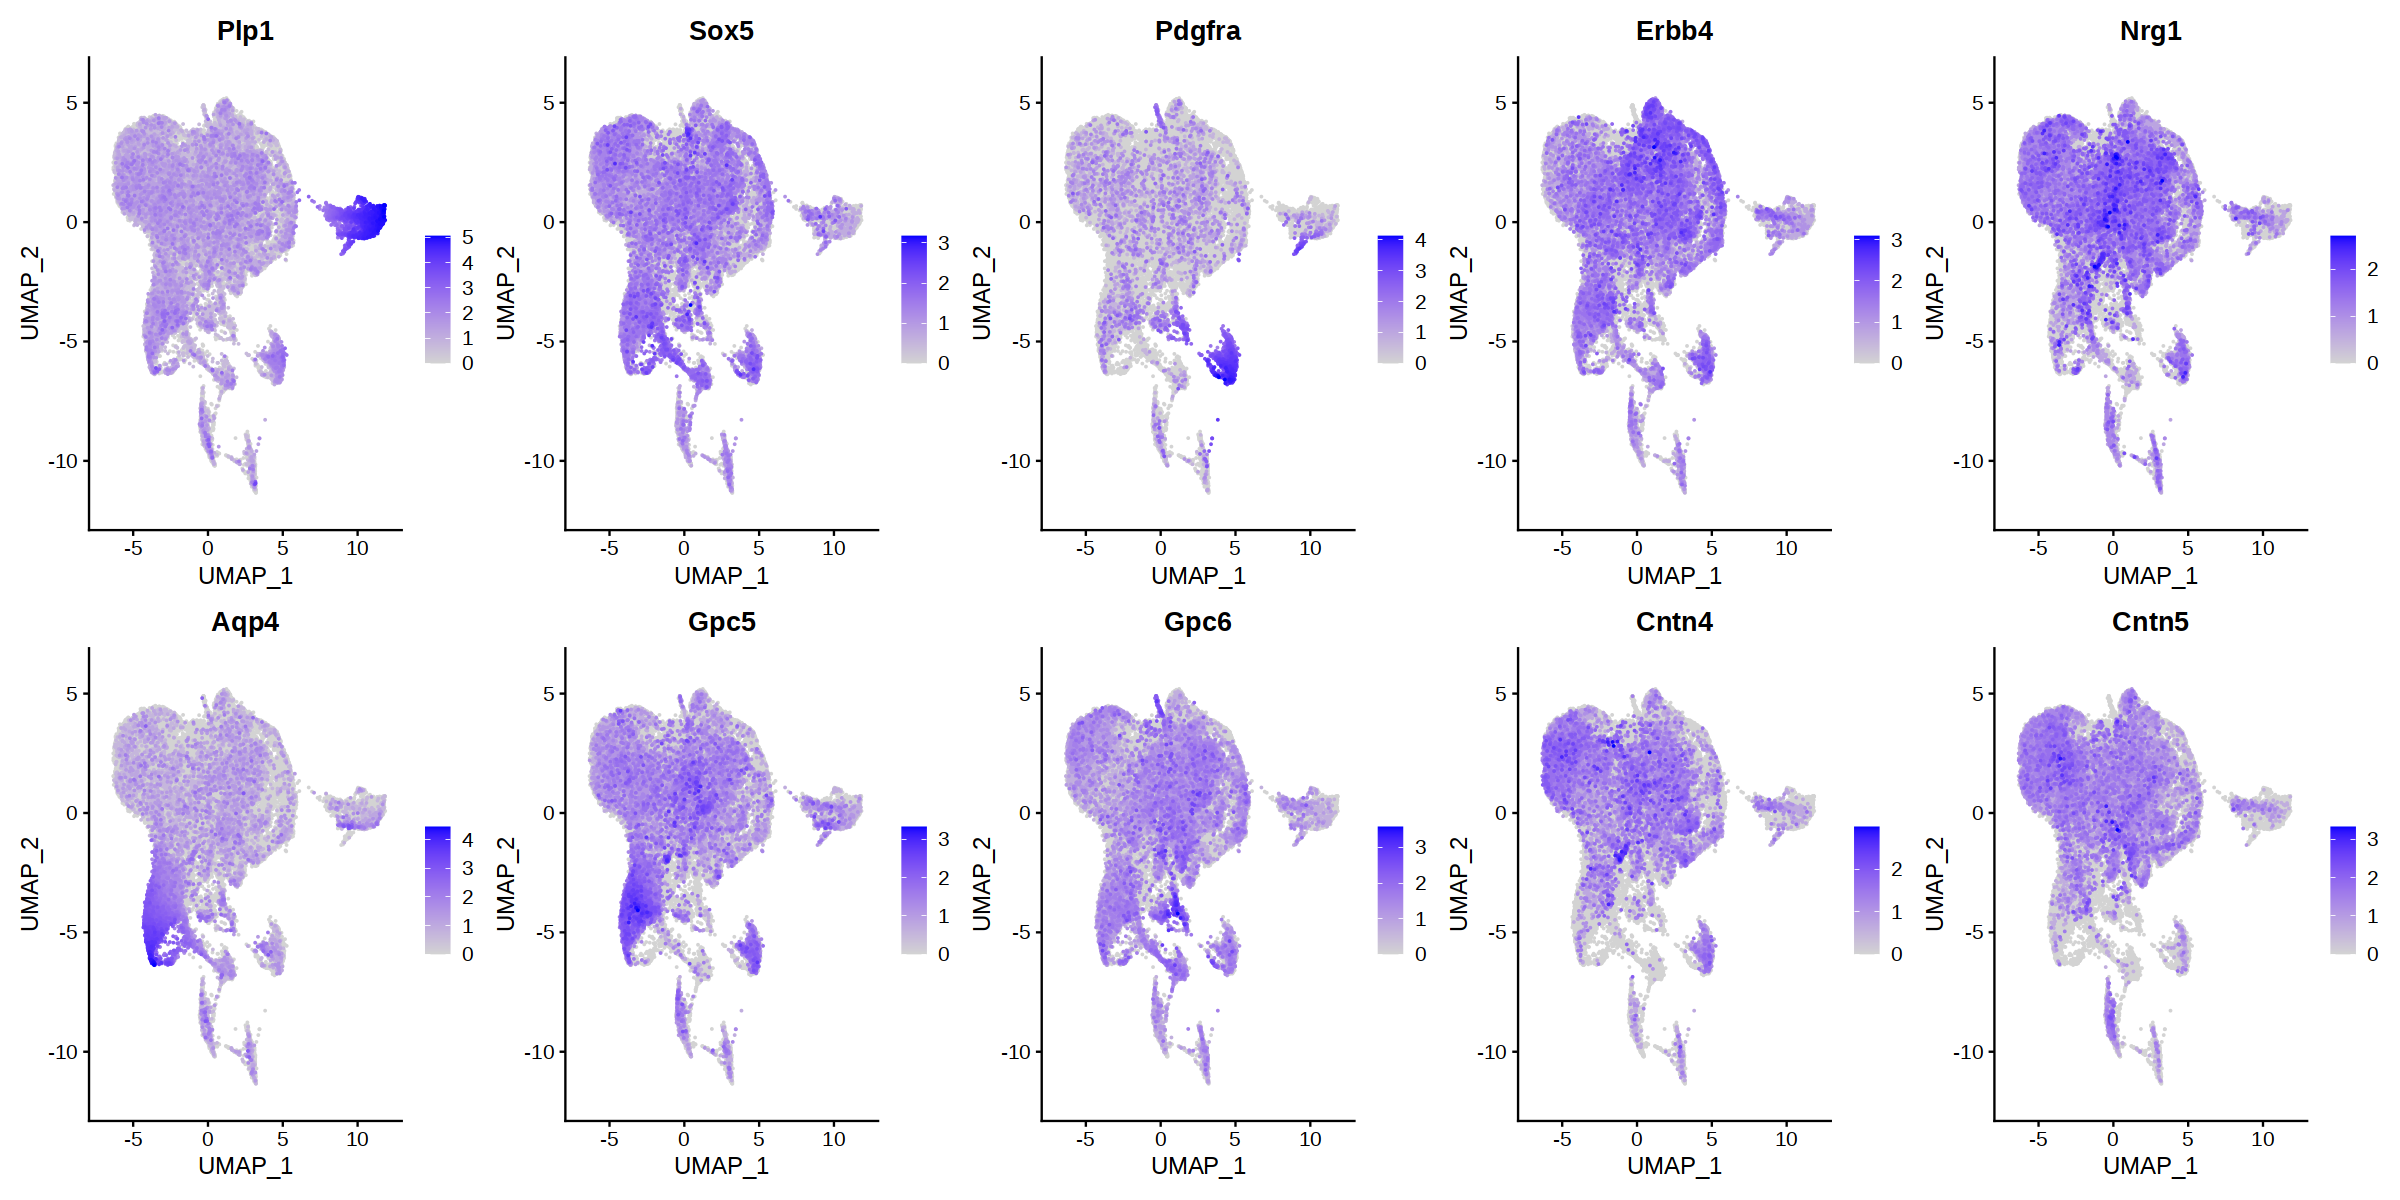

In [30]:
# FeaturePlot(xenium.obj, top_neuron_markers, reduction = "umap", ncol = 5, order=TRUE)
options(repr.plot.width=20, repr.plot.height=10)

FeaturePlot(xenium.obj,
            c("Plp1", "Sox5", "Pdgfra", "Erbb4", "Nrg1", "Aqp4", "Gpc5", "Gpc6", "Cntn4", "Cntn5"),
            reduction = "umap",
            ncol=5, 
            order=TRUE)

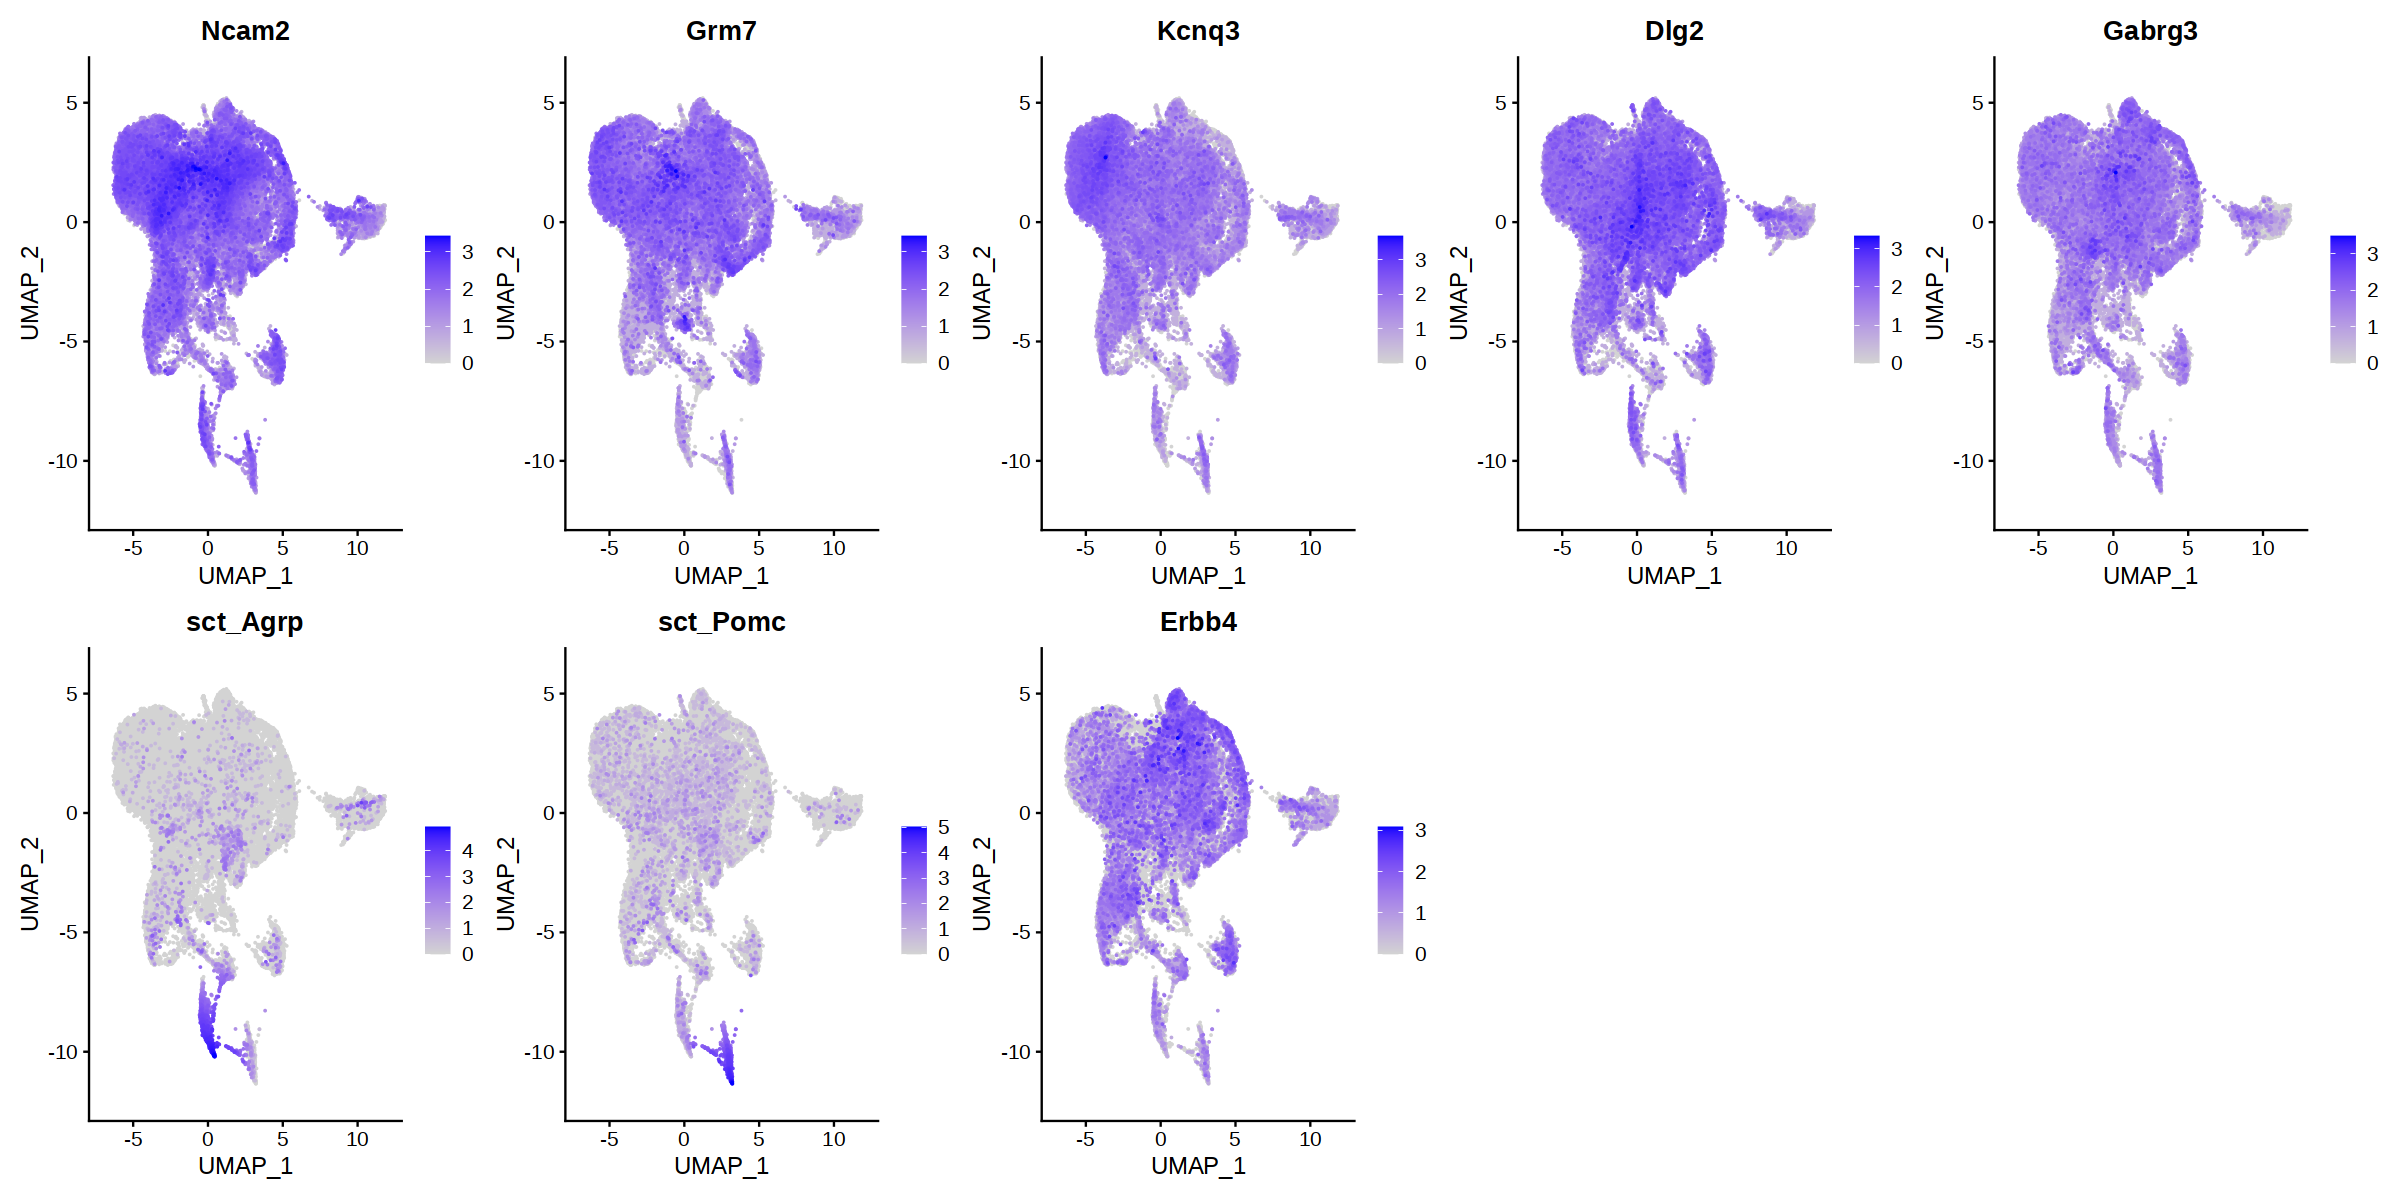

In [31]:
marker_genes <- c("Ncam2", "Grm7", "Kcnq3", "Dlg2", "Gabrg3", "sct_Agrp", "sct_Pomc", "Erbb4")


options(repr.plot.width=20, repr.plot.height=10)

FeaturePlot(xenium.obj,
            marker_genes,
            reduction = "umap",
            ncol=5, 
            order=TRUE)

In [32]:
obj_fgf1@assays

$RNA
Assay data with 28887 features for 58235 cells
First 10 features:
 ENSMUSG00000089699, ENSMUSG00000104238, Lypla1, Tcea1, Atp6v1h, Oprk1, Rb1cc1, Alkal1, St18, Pcmtd1 

$SCT
SCTAssay data with 26292 features for 58235 cells, and 1 SCTModel(s) 
Top 10 variable features:
 Gpc5, Slc4a4, St18, Col25a1, ENSMUSG00000108532, Il1rapl2, Trpm3, Col23a1, Bcas1, Sox6 

$integrated
SCTAssay data with 3434 features for 58235 cells, and 3 SCTModel(s) 
First 10 features:
 Gpc5, Slc4a4, St18, ENSMUSG00000108532, Il1rapl2, Trpm3, Col25a1, Col23a1, Adarb2, Slc1a2 


In [33]:
# anchors = FindIntegrationAnchors(obj_list, assay=c('SCT', 'SCT'), anchor.features=xenium_genes)
anchors <- FindTransferAnchors(reference = obj_fgf1, query = xenium.obj, features = xenium_genes,  
                               normalization.method = 'SCT',
                               reduction = 'pcaproject',
                               query.assay = 'SCT',
                               reference.assay = 'SCT',
                               reference.reduction = "pca", 
                               recompute.residuals = F,
                               verbose=TRUE)

Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 19039 anchors



In [34]:
xenium.obj_unimapped <- MapQuery(anchorset = anchors, reference = obj_fgf1, query = xenium.obj,
                                 refdata = list(labels = "labels"), reference.reduction = "pca", reduction.model = "umap")

Warning message:
“`invoke()` is deprecated as of rlang 0.4.0.
Please use `exec()` or `inject()` instead.
This warning is displayed once per session.”
Finding integration vectors

Finding integration vector weights

Predicting cell labels

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”

Integrating dataset 2 with reference dataset

Finding integration vectors

Integrating data

Computing nearest neighbors

Running UMAP projection

10:20:06 Read 63884 rows

10:20:06 Processing block 1 of 1

10:20:06 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:20:07 Initializing by weighted average of neighbor coordinates using 1 thread

10:20:08 Commencing optimization for 67 epochs, with 1916520 positive edges

10:20:28 Finished



In [35]:
qs::qsave(xenium.obj_unimapped, '230426_xenium_unimapped.qs')

In [39]:
# anchors = FindIntegrationAnchors(obj_list, assay=c('SCT', 'SCT'), anchor.features=xenium_genes)
anchors_cca <- FindTransferAnchors(reference = obj_fgf1, query = xenium.obj, features = xenium_genes,  
                               normalization.method = 'SCT',
                               reduction = 'cca',
                               query.assay = 'SCT',
                               reference.assay = 'SCT',
                               recompute.residuals = F,
                               verbose=TRUE)

Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 69758 anchors



In [40]:
xenium.obj_unimapped_cca <- MapQuery(anchorset = anchors_cca, reference = obj_fgf1, query = xenium.obj,
                                 refdata = list(labels = "labels"), reduction.model = "umap")

Finding integration vectors

Finding integration vector weights

Predicting cell labels

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Computing nearest neighbors

Running UMAP projection

11:01:41 Read 63884 rows

11:01:41 Processing block 1 of 1

11:01:41 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

11:01:43 Initializing by weighted average of neighbor coordinates using 1 thread

11:01:43 Commencing optimization for 67 epochs, with 1916520 positive edges

11:02:14 Finished



In [ ]:
qs::qsave(xenium.obj_unimapped_cca, '230426_xenium_unimapped_cca.qs')

In [47]:
obj_fgf1 = obj_fgf1 %>% 
Seurat::RunUMAP(assay='SCT', slot='counts', features = xenium_genes, return.model = TRUE)

UMAP will return its model

01:14:55 UMAP embedding parameters a = 0.9922 b = 1.112

01:14:55 Read 58235 rows and found 98 numeric columns

01:14:55 Using Annoy for neighbor search, n_neighbors = 30

01:14:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

01:15:08 Writing NN index file to temp file /scratch/nmq407/R_tmp//RtmpYaoX8N/file101c057b2b1ad

01:15:08 Searching Annoy index using 1 thread, search_k = 3000

01:15:33 Annoy recall = 100%

01:15:38 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

01:15:44 Initializing from normalized Laplacian + noise (using irlba)

01:15:52 Commencing optimization for 200 epochs, with 2497056 positive edges

01:17:15 Optimization finished



In [48]:
# anchors = FindIntegrationAnchors(obj_list, assay=c('SCT', 'SCT'), anchor.features=xenium_genes)
anchors_cca <- FindTransferAnchors(reference = obj_fgf1, query = xenium.obj, features = xenium_genes,  
                               normalization.method = 'SCT',
                               reduction = 'cca',
                               query.assay = 'SCT',
                               reference.assay = 'SCT',
                               recompute.residuals = F,
                               verbose=TRUE)

Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 69758 anchors



In [49]:
xenium.obj_unimapped_cca <- MapQuery(anchorset = anchors_cca, reference = obj_fgf1, query = xenium.obj,
                                 refdata = list(labels = "labels"), reduction.model = "umap")

Finding integration vectors

Finding integration vector weights

Predicting cell labels

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Computing nearest neighbors

Running UMAP projection

01:25:46 Read 63884 rows

01:25:46 Processing block 1 of 1

01:25:46 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

01:25:47 Initializing by weighted average of neighbor coordinates using 1 thread

01:25:47 Commencing optimization for 67 epochs, with 1916520 positive edges

01:26:18 Finished



In [50]:
qs::qsave(xenium.obj_unimapped_cca, '230426_xenium_unimapped_cca_fgf1XEgenesUMAP.qs')

In [ ]:
options(repr.plot.width=20, repr.plot.height=20)
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", group.by = "predicted.labels", label = TRUE, repel = TRUE) + theme(legend.position = "none")  + labs(title = "Spatial on spatial UMAP")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", group.by = "predicted.labels", label = TRUE, repel = TRUE) + theme(legend.position = "none") + labs(title = "Spatial on snRNAseq reference UMAP")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", label = TRUE, repel = TRUE) + theme(legend.position = "none") + labs(title = "snRNAseq reference")
options(repr.plot.width=30, repr.plot.height=10)
p1 + p2 + p3



In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(xenium.obj_unimapped, group.by = 'treatment', reduction = "ref.umap", order = T)

In [ ]:
xenium.obj_unimapped

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'a1_Tany-Astrocytes'
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'MOL'
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'Pomc_Lepr'
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'NG2_OPC2'
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'Unassigned1.sc17.sc28'
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=20, repr.plot.height=10)
ImageDimPlot(xenium.obj, cols = "polychrome", size = 0.75, cells = highlight_cells_xe)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'Agrp'
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(str_detect(predicted.labels, cell_type)) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(str_detect(labels, cell_type)) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'Pomc'
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(str_detect(predicted.labels, cell_type)) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(str_detect(labels, cell_type)) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'Nr5a1_Bdnf'
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'NFOL'
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'Agrp'
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'Pomc'
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels.score > 0.9) %>%
rownames
length(highlight_cells_xe)
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(xenium.obj_unimapped, reduction = "umap", group.by = "seurat_clusters", label = TRUE, repel = TRUE) + theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = paste0('predicted.label.score'))

In [ ]:
anchors@anchors %>%
as.data.frame 

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)

In [ ]:
 xenium.obj_unimapped %>%
`[[` %>%
group_by(predicted.labels) %>%
summarise(predicted.labels.score = mean(predicted.labels.score)) %>%
arrange(desc(predicted.labels.score))

In [ ]:
obj_fgf1 = obj_fgf1 %>% 
    Seurat::RunPCA(features = xenium_genes) %>%
    Seurat::RunUMAP(features = xenium_genes, return.model = TRUE)

In [ ]:
obj_list = list(obj_fgf1 , xenium.obj_unimapped)

In [ ]:
# anchors = FindIntegrationAnchors(obj_list, assay=c('SCT', 'SCT'), anchor.features=xenium_genes)
anchors <- FindTransferAnchors(reference = obj_fgf1, query = xenium.obj_unimapped, features = xenium_genes,  
                               normalization.method = 'SCT',
                               reduction = 'pcaproject',
                               query.assay = 'Xenium',
                               reference.assay = 'SCT',
                               reference.reduction = "pca",
                               verbose=TRUE)

In [ ]:
xenium.obj_unimapped <- MapQuery(anchorset = anchors, reference = obj_fgf1, query = xenium.obj_unimapped,
                                 refdata = list(labels = "labels"), reference.reduction = "pca", reduction.model = "umap")

In [ ]:
options(repr.plot.width=20, repr.plot.height=20)
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", group.by = "predicted.labels", label = TRUE, repel = TRUE) + theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", group.by = "predicted.labels", label = TRUE, repel = TRUE) + theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", label = TRUE, repel = TRUE) + theme(legend.position = "none")




In [ ]:
xenium.obj_unimapped

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
p1 + p2 + p3

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'a1_Tany-Astrocytes'
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'MOL'
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'Pomc_Lepr'
top_cutoff = 0.50
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>% 
top_n(n = round(nrow(.) * top_cutoff), wt = predicted.labels.score) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'NG2_OPC2'
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'Nr5a1_Bdnf'
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'NFOL'
top_cutoff = 0.10
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>% 
top_n(n = round(nrow(.) * top_cutoff), wt = predicted.labels.score) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'NFOL'
top_cutoff = 1
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels == cell_type) %>% 
top_n(n = round(nrow(.) * top_cutoff), wt = predicted.labels.score) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
highlight_cells_xe = xenium.obj_unimapped %>%
`[[` %>%
filter(predicted.labels.score > 0.9) %>%
rownames
length(highlight_cells_xe)
p1 = DimPlot(xenium.obj_unimapped, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj_unimapped, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(xenium.obj_unimapped, reduction = "umap", group.by = "seurat_clusters", label = TRUE, repel = TRUE) + theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = paste0('predicted.label.score'))

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)

In [ ]:
 xenium.obj_unimapped %>%
`[[` %>%
group_by(predicted.labels) %>%
summarise(predicted.labels.score = mean(predicted.labels.score)) %>%
arrange(desc(predicted.labels.score))

In [ ]:
xenium.obj_unimapped %>% `[[`